In [1]:
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/1m_Open.csv
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/1m_Short.csv
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/MIniCricuits_Open.csv
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/MIniCricuits_Short.csv

--2025-11-05 17:50:35--  https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/1m_Open.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40192 (39K) [text/plain]
Saving to: ‘1m_Open.csv’

1m_Open.csv         100%[===================>]  39.25K  --.-KB/s    in 0.002s  

2025-11-05 17:50:36 (16.2 MB/s) - ‘1m_Open.csv’ saved [40192/40192]

--2025-11-05 17:50:36--  https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/1m_Short.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
class data_from_s1p(object):
    def __init__(self, fileName):
        raw_data = np.loadtxt(fileName)
        self.f = raw_data[:,0]
        self.omega = 2 * np.pi * self.f
        self.S11 = raw_data[:,1] + 1.0j*raw_data[:,2]
        self.Zin = 50 * (1 + self.S11)/(1 - self.S11)

class data_from_cvs(object):
    def __init__(self, fileName):
        raw_data = np.loadtxt(fileName, skiprows=1, delimiter=',', usecols=[0,1,2])
        self.f = raw_data[:,0]
        self.omega = 2 * np.pi * self.f
        self.S11 = raw_data[:,1] + 1.0j*raw_data[:,2]
        self.Zin = 50 * (1 + self.S11)/(1 - self.S11)


In [4]:
#dataShort = data_from_s1p('Data_Short.s1p')
#dataOpen = data_from_s1p('Data_Open.s1p')

dataOpen = data_from_cvs('MIniCricuits_Open.csv')
dataShort = data_from_cvs('MIniCricuits_Short.csv')

d = 76.2E-3 + 0.017 #longitud del Cable Minicircuits 086-3SM+ + conector

f = dataOpen.f
omega = dataOpen.omega
lg = np.log( (dataOpen.S11 - dataShort.S11)/2 ) #Promedio de las medidas Open y Short
gamma = -(lg.real + 1.0j * np.unwrap(lg.imag))/ (2 * d)

Z0c = np.sqrt(dataOpen.Zin * dataShort.Zin)

Z0 = 50

R = np.real(gamma * Z0)
L = np.imag(gamma * Z0)/omega

G = np.real(gamma / Z0)
C = np.imag(gamma / Z0)/omega

Text(0.5, 1.0, 'Open')

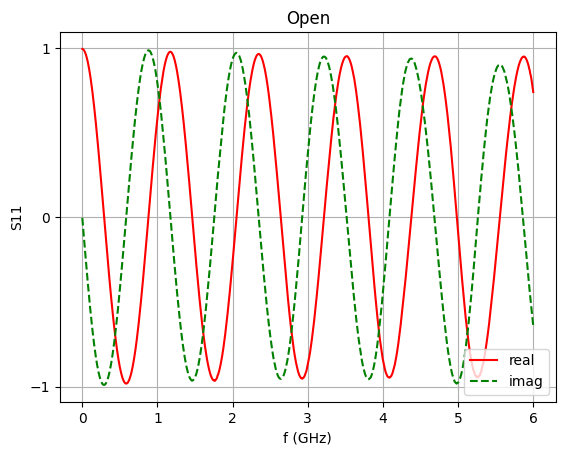

In [5]:
plt.figure("S11")
plt.plot(f/1E9, dataOpen.S11.real, "r-")
plt.plot(f/1E9, dataOpen.S11.imag, "g--")
plt.xlabel('f (GHz)')
plt.ylabel('S11')
plt.yticks([-1,0,1])
plt.grid(True)
plt.legend(['real', 'imag'], loc=4)
plt.title('Open')

Text(0.5, 1.0, 'Open')

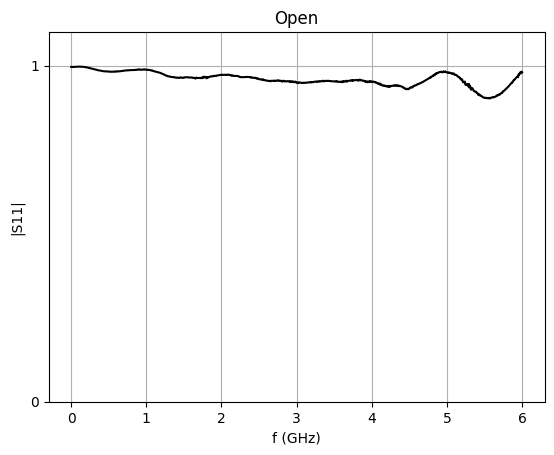

In [6]:
plt.figure("S11")
plt.plot(f/1E9, np.abs(dataOpen.S11), "k-")
plt.xlabel('f (GHz)')
plt.ylabel('|S11|')
plt.yticks([0,1])
plt.ylim(0,1.1)
plt.grid(True)
plt.title('Open')

Text(0.5, 1.0, 'Short')

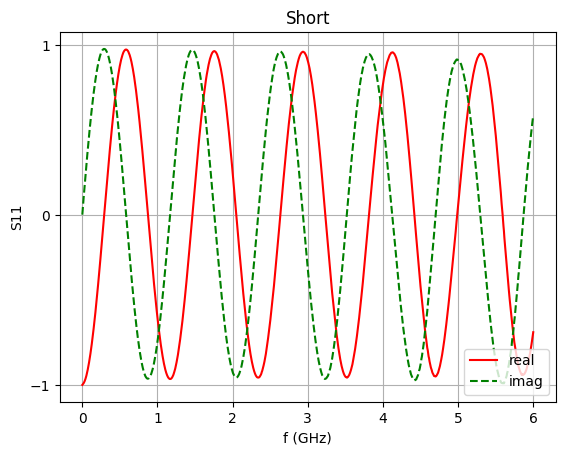

In [7]:
plt.figure("S11")
plt.plot(f/1e9, dataShort.S11.real, "r-")
plt.plot(f/1e9, dataShort.S11.imag, "g--")
plt.xlabel('f (GHz)')
plt.ylabel('S11')
plt.yticks([-1,0,1])
plt.grid(True)
plt.legend(['real', 'imag'], loc=4)
plt.title('Short')

Text(0.5, 1.0, 'Short')

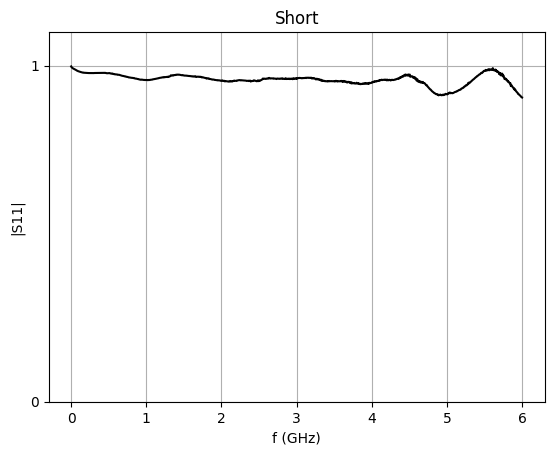

In [8]:
plt.figure("S11")
plt.plot(f/1e9, np.abs(dataShort.S11), "k-")
plt.xlabel('f (GHz)')
plt.ylabel('|S11|')
plt.yticks([0,1])
plt.ylim(0,1.1)
plt.grid(True)
plt.title('Short')

Text(0.5, 1.0, 'Beta')

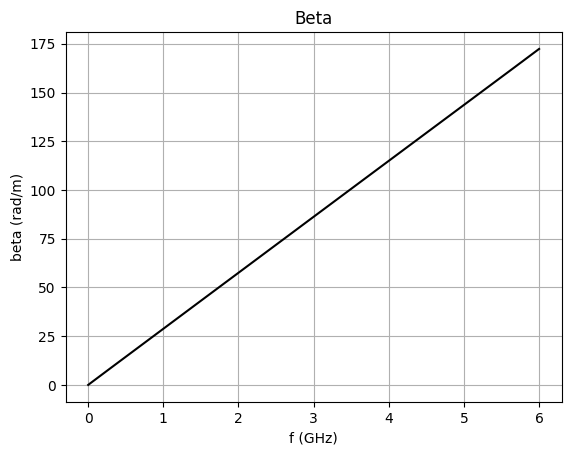

In [9]:
plt.figure("Beta")
plt.plot(f/1e9, gamma.imag, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('beta (rad/m)')
plt.grid(True)
plt.title('Beta')

Text(0.5, 1.0, 'Alpha')

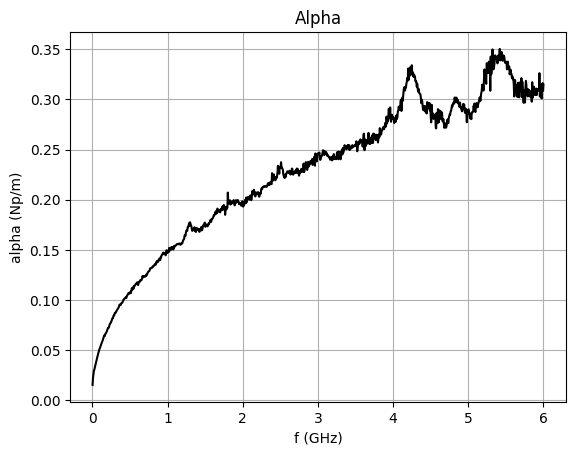

In [10]:
plt.figure("Alpha")
plt.plot(f/1e9, gamma.real, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('alpha (Np/m)')
plt.grid(True)
plt.title('Alpha')

(0.0, 300000000.0)

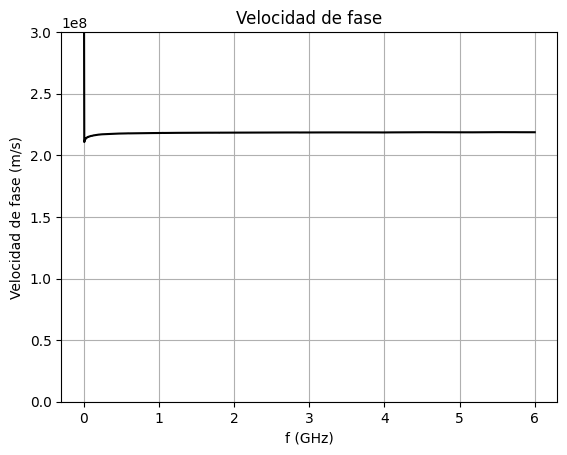

In [11]:
vf = omega/gamma.imag

plt.figure("Velocidad de fase")
plt.plot(f/1e9, vf, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('Velocidad de fase (m/s)')
plt.grid(True)
plt.title('Velocidad de fase')
plt.ylim(0,3E8)

Text(0.5, 1.0, 'Z0 Calculada')

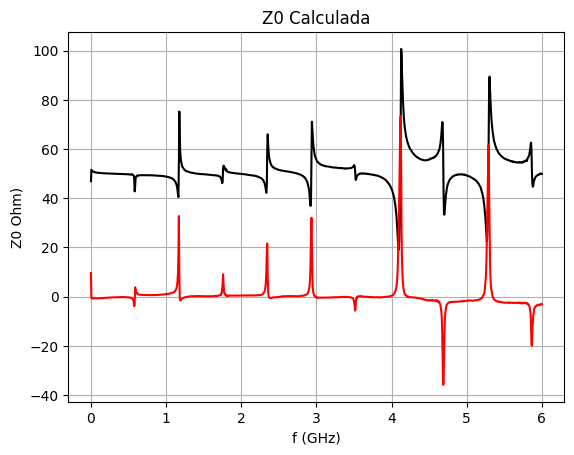

In [13]:
plt.figure("Z0")
plt.plot(f/1e9, Z0c.real, "k-")
plt.plot(f/1e9, Z0c.imag, "r-")
plt.xlabel('f (GHz)')
plt.ylabel('Z0 Ohm)')
plt.grid(True)
plt.title('Z0 Calculada')

Text(0.5, 1.0, 'R')

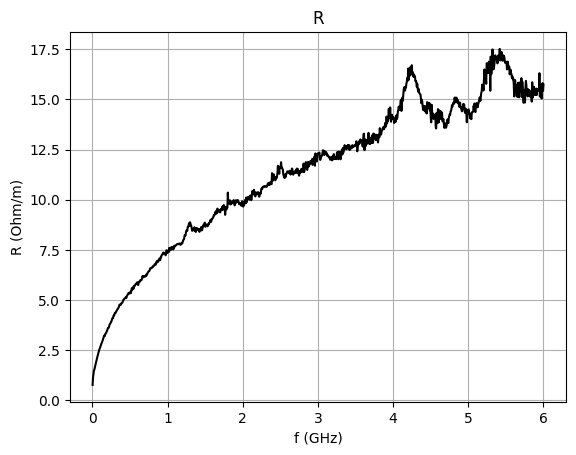

In [14]:
plt.figure("Resistencia")
plt.plot(f/1e9, R, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('R (Ohm/m)')
plt.grid(True)
plt.title('R')

Text(0.5, 1.0, 'G')

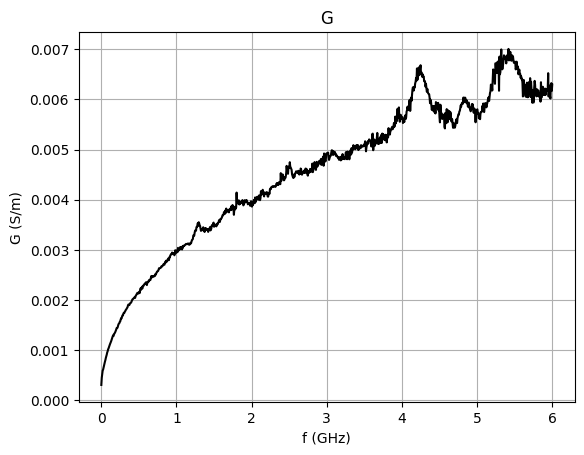

In [15]:
plt.figure("Conductancia")
plt.plot(f/1e9, G, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('G (S/m)')
plt.grid(True)
plt.title('G')

Text(0.5, 1.0, 'C')

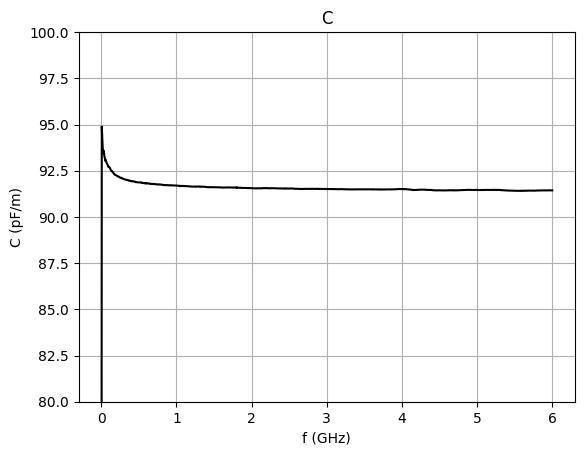

In [19]:
plt.figure("Capacitancia")
plt.plot(f/1e9, C*1E12, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('C (pF/m)')
plt.ylim(80,100)
plt.grid(True)
plt.title('C')

Text(0.5, 1.0, 'L')

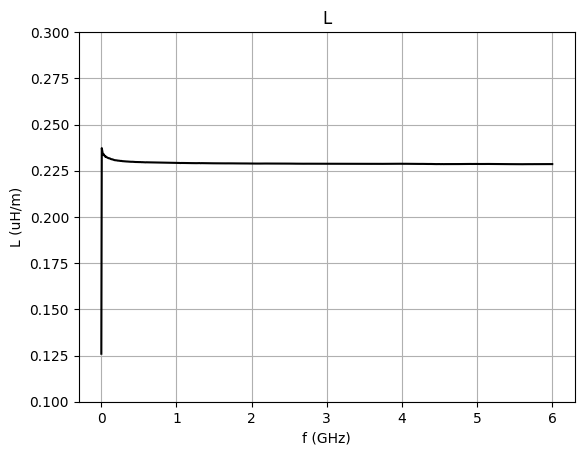

In [22]:
plt.figure("Inductancia")
plt.plot(f/1e9, L*1E6, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('L (uH/m)')
plt.ylim(0.1,0.3)
plt.grid(True)
plt.title('L')